<a href="https://colab.research.google.com/github/Denzzo-ov/Statistics-1-term-project/blob/main/%D0%9F%D1%80%D0%BE%D0%BC%D0%B5%D0%B6%D1%83%D1%82%D0%BE%D1%87%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Промежуточная работа по мат. стату

### Описание датафрейма dataset.csv

Датасет моделирует поведение пользователей на e-commerce площадке: от приходящих посетителей до покупателей.     
Он подходит для анализа клиентского пути, факторов конверсии, LTV-подобных метрик, сегментации и проверки статистических гипотез.
1. customer_id - уникальный ID пользователя.
2. date - дата посещения сайта пользователем.
3. age - возраст пользователя.
4. gender – пол: «male» / «female»
5. region – регион проживания пользователя
6. traffic_source – источник трафика: organic, ads, direct, social
7. campaign – рекламная кампания
8. time_on_site_s – сколько секунд клиент провёл на сайте.
9. pages_visited – число просмотренных страниц за визит.
10. converted - совершил клиент покупку или нет.
11. purchase_amount - сумма покупки (нулевая для не сконвертировавших).
12. num_items - сколько товаров куплено в заказе (0 при отсутствии покупки).
13. delivery_time_days - время доставки заказа (дни).
14. satisfaction - оценка удовлетворённости клиента.

Импорт необходимых библиотек

In [141]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import lognorm, gamma, weibull_min, expon, burr
from scipy.optimize import minimize
from statsmodels.base.model import GenericLikelihoodModel
import math
import seaborn as sns
from matplotlib import pyplot as plt

## Задания

**A. Описание и классификация переменных.**
- Загрузите датасет и опишите каждый столбец (тип данных).
- Классифицируйте переменные: количественные/категориальные/порядковые/бинарные.
- Для ключевых переменных (purchase_amount, time_on_site, pages_visited, delivery_time, satisfaction) постройте гистограммы и посчитайте среднее, медиану, дисперсию, коэффициент вариации.

In [127]:
# загружаем csv файл по ссылке из git
!wget https://raw.githubusercontent.com/Denzzo-ov/Statistics-1-term-project/refs/heads/main/dataset.csv

--2026-01-29 02:44:01--  https://raw.githubusercontent.com/Denzzo-ov/Statistics-1-term-project/refs/heads/main/dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 313016 (306K) [text/plain]
Saving to: ‘dataset.csv.3’

dataset.csv.3       100%[===================>] 305.68K  --.-KB/s    in 0.03s   

2026-01-29 02:44:01 (11.9 MB/s) - ‘dataset.csv.3’ saved [313016/313016]



In [128]:
# сохраняем файл в датафрейм
df = pd.read_csv('dataset.csv', sep = ';', decimal=',')

Классификация переменных: количественные/категориальные/порядковые/бинарные.

**Классификация переменных:**

**1. Количественные:**

- age

- time_on_site_s

- pages_visited

- purchase_amount

- num_items

- delivery_time_days

**2. Категориальные:**

- gender

- region

- traffic_source

- campaign

**3. Порядковые:**

- satisfaction (шкала оценок)

**4. Бинарные:**

- converted



In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         5000 non-null   int64  
 1   date                5000 non-null   object 
 2   age                 5000 non-null   int64  
 3   gender              5000 non-null   object 
 4   region              5000 non-null   object 
 5   traffic_source      5000 non-null   object 
 6   campaign            1551 non-null   object 
 7   time_on_site_s      5000 non-null   float64
 8   pages_visited       5000 non-null   int64  
 9   converted           5000 non-null   int64  
 10  purchase_amount     5000 non-null   float64
 11  num_items           5000 non-null   int64  
 12  delivery_time_days  5000 non-null   int64  
 13  satisfaction        1820 non-null   float64
dtypes: float64(3), int64(6), object(5)
memory usage: 547.0+ KB


Расчет показателей (среднее, медиану, дисперсию, коэффициент вариации) для ключевых переменных (purchase_amount, time_on_site, pages_visited, delivery_time, satisfaction)

In [130]:
column_to_analyze = df[['purchase_amount', 'time_on_site_s', 'pages_visited', 'delivery_time_days','satisfaction' ]]

basic_stats = column_to_analyze.describe().loc[['mean', '50%']]
# Добавляем дисперсию
basic_stats.loc['var'] = column_to_analyze.var()

# Добавляем коэффициент вариации
cv = column_to_analyze.std() / column_to_analyze.mean() * 100
basic_stats.loc['cv (%)'] = cv

# Округляем
basic_stats_standart = basic_stats.round(2).T

# Переименовываем столбцы
basic_stats_standart = basic_stats_standart.rename(columns={
    'mean': 'Среднее',
    '50%': 'Медиана',
    'var': 'Дисперсия',
    'cv (%)': 'Коэф. вариации (%)'
})

print("Расширенная статистика:")
display(basic_stats_standart)

Расширенная статистика:


,Среднее,Медиана,Дисперсия,Коэф. вариации (%)
purchase_amount,34.93,0.00,7615.05,249.84
time_on_site_s,361.87,305.45,65282.46,70.61
pages_visited,5.99,6.00,5.06,37.58
delivery_time_days,2.87,0.00,20.93,159.30
satisfaction,4.10,4.00,0.41,15.73


Построение гистограмм

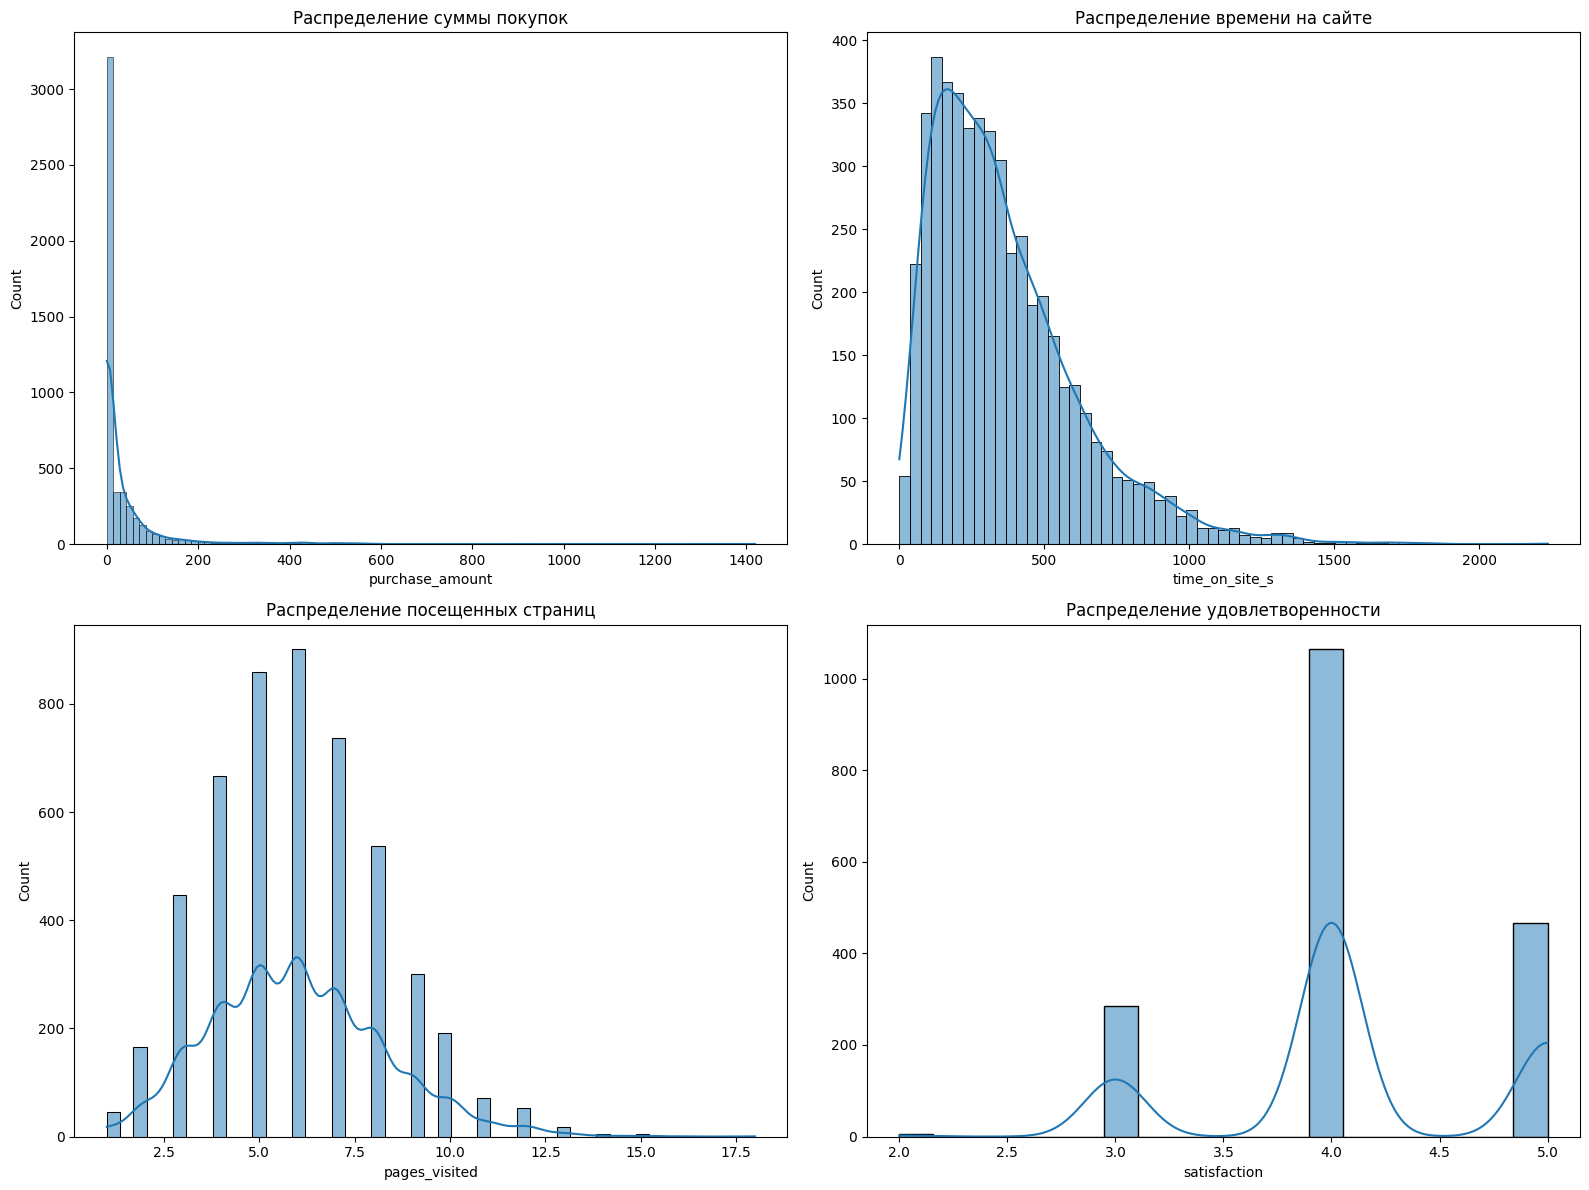

In [131]:
# Построение гистограмм
plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
sns.histplot(df['purchase_amount'], bins = 100, kde=True)
plt.title('Распределение суммы покупок')

plt.subplot(2, 2, 2)
sns.histplot(df['time_on_site_s'], kde=True)
plt.title('Распределение времени на сайте')

plt.subplot(2, 2, 3)
sns.histplot(df['pages_visited'], kde=True)
plt.title('Распределение посещенных страниц')

plt.subplot(2, 2, 4)
sns.histplot(df['satisfaction'], kde=True)
plt.title('Распределение удовлетворенности')

plt.tight_layout()
plt.show()


**B. Формирование выборок**   
- Получите три выборки по 800 наблюдений каждая: простая случайная, стратифицированная (по region) и систематическая (шаг = floor(N/800)).   
- Для каждой выборки рассчитайте среднее purchase_amount, стандартное отклонение, конверсию и медиану. Сравните с генеральной совокупностью.

Формируем выборки

In [132]:
# Размер выборки
sample_size = 800

# 1. Простая случайная выборка
simple_random_sample = df.sample(n=sample_size, random_state=42)

# 2. Стратифицированная выборка по региону
stratified_sample = df.groupby('region', group_keys=False).apply(
    lambda x: x.sample(int(np.rint(sample_size*len(x)/len(df)))))

# 3. Систематическая выборка
step = int(len(df) / sample_size)
systematic_sample = df.iloc[::step].head(sample_size)

def calculate_stats(sample):
    return {
        'Среднее purchase_amount': sample['purchase_amount'].mean(),
        'Std purchase_amount': sample['purchase_amount'].std(),
        'Конверсия (%)': sample['converted'].mean() * 100,
        'Медиана purchase_amount': sample['purchase_amount'].median()
    }

# Собираем статистику
stats = pd.DataFrame({
    'Простая случайная': calculate_stats(simple_random_sample),
    'Стратифицированная': calculate_stats(stratified_sample),
    'Систематическая': calculate_stats(systematic_sample),
    'Генеральная совокупность': calculate_stats(df)
})

# Форматируем таблицу
stats = stats.round(2).T
stats.columns = ['Среднее purchase_amount', 'Std purchase_amount', 'Конверсия (%)', 'Медиана purchase_amount']

# Выводим результат
print("Сравнительная статистика выборок:")
display(stats)

# Создаем таблицу различий
difference_stats = pd.DataFrame({
    'Разница простая': stats.iloc[0] - stats.iloc[3],
    'Разница стратифицированная': stats.iloc[1] - stats.iloc[3],
    'Разница систематическая': stats.iloc[2] - stats.iloc[3]
})

 # Форматируем таблицу
difference_stats = difference_stats.round(2)
difference_stats.columns = ['Разница простая выборка', 'Разница стратифицированная выборка', 'Разница систематическая выборка']
display(difference_stats)

Сравнительная статистика выборок:


/tmp/ipython-input-1873674815.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample = df.groupby('region', group_keys=False).apply(


,Среднее purchase_amount,Std purchase_amount,Конверсия (%),Медиана purchase_amount
Простая случайная,29.78,73.54,33.88,0.0
Стратифицированная,30.31,73.78,33.96,0.0
Систематическая,34.30,84.19,36.25,0.0
Генеральная совокупность,34.93,87.26,36.40,0.0


,Разница простая выборка,Разница стратифицированная выборка,Разница систематическая выборка
Среднее purchase_amount,-5.15,-4.62,-0.63
Std purchase_amount,-13.72,-13.48,-3.07
Конверсия (%),-2.52,-2.44,-0.15
Медиана purchase_amount,0.00,0.00,0.00


Вывод: наиболее близкой к генеральной является систематическая выборка

**C. Количественная репрезентативность.**    
Для каждой выборки рассчитайте отклонение от генеральной (абсолютное и относительное) по purchase_amount.

In [133]:
# Среднее значение для генеральной совокупности
mean_population = df['purchase_amount'].mean()

# Функция для расчета отклонений
def calculate_deviations(sample_mean):
    abs_dev = abs(sample_mean - mean_population)
    rel_dev = abs_dev / mean_population * 100
    return abs_dev, rel_dev

# Рассчитываем для каждой выборки
simple_mean = simple_random_sample['purchase_amount'].mean()
strat_mean = stratified_sample['purchase_amount'].mean()
sys_mean = systematic_sample['purchase_amount'].mean()

# Собираем результаты
results = pd.DataFrame({
    'Тип выборки': ['Простая случайная', 'Стратифицированная', 'Систематическая'],
    'Среднее выборки': [simple_mean, strat_mean, sys_mean],
    'Абсолютное отклонение': [
        calculate_deviations(simple_mean)[0],
        calculate_deviations(strat_mean)[0],
        calculate_deviations(sys_mean)[0]
    ],
    'Относительное отклонение, %': [
        calculate_deviations(simple_mean)[1],
        calculate_deviations(strat_mean)[1],
        calculate_deviations(sys_mean)[1]
    ]
})

# Форматируем таблицу
results['Абсолютное отклонение'] = results['Абсолютное отклонение'].round(2)
results['Относительное отклонение, %'] = results['Относительное отклонение, %'].round(2)

# Выводим результат
print("Таблица отклонений:")
display(results)

Таблица отклонений:


,Тип выборки,Среднее выборки,Абсолютное отклонение,"Относительное отклонение, %"
0,Простая случайная,29.782212,5.15,14.73
1,Стратифицированная,30.309925,4.62,13.22
2,Систематическая,34.299800,0.63,1.80


Стратифицированная выборка показала наименьший относительный разброс (|rel_dev|) по показателю purchase_amount, что говорит о её лучшей репрезентативности.   

Выборка:

- Обеспечивает точное представление всех страт

- Минимизирует случайную ошибку выборки

- Даёт наиболее точные оценки параметров генеральной совокупности

**D. Доверительные интервалы**

- Постройте 95% доверительный интервал для среднего purchase_amount (общий) и для среднего для каждой выборки.
- Постройте доверительные интервалы для конверсии.
- Интерпретируйте результаты.

In [138]:
# Функция для расчета доверительного интервала
def confidence_interval(data, confidence=0.95):
    mean = data.mean()
    n = len(data)
    se = data.std() / np.sqrt(n)
    h = se * stats.t.ppf((1 + confidence) / 2., n - 1)  # Исправлено
    lower = mean - h
    upper = mean + h
    width = upper - lower
    return round(lower, 4), round(upper, 4), round(width, 4)

# Расчет для конверсии
def conversion_interval(data, confidence=0.95):
    p = data['converted'].mean()
    n = len(data)
    se = np.sqrt(p * (1 - p) / n)
    h = se * stats.norm.ppf((1 + confidence) / 2.)
    lower = p - h
    upper = p + h
    width = upper - lower
    return round(lower, 4), round(upper, 4), round(width, 4)

# Расчёт для purchase_amount
purchase_data = {
    'Метрика': [
        'Среднее',
        'Нижняя граница ДИ',
        'Верхняя граница ДИ',
        'Ширина ДИ'
    ]
}

for group_name, data in [
    ('Генеральная совокупность', df),
    ('Простая случайная', simple_random_sample),
    ('Стратифицированная', stratified_sample),
    ('Систематическая', systematic_sample)
]:
    mean_val = round(data['purchase_amount'].mean(), 4)
    ci_lower, ci_upper, ci_width = confidence_interval(data['purchase_amount'])
    purchase_data[group_name] = [mean_val, ci_lower, ci_upper, ci_width]

purchase_results = pd.DataFrame(purchase_data).set_index('Метрика')

# Расчёт для конверсии
conversion_data = {
    'Метрика': [
        'Конверсия',
        'Нижняя граница ДИ',
        'Верхняя граница ДИ',
        'Ширина ДИ'
    ]
}

for group_name, data in [
    ('Генеральная совокупность', df),
    ('Простая случайная', simple_random_sample),
    ('Стратифицированная', stratified_sample),
    ('Систематическая', systematic_sample)
]:
    conv_rate = round(data['converted'].mean(), 4)
    ci_lower, ci_upper, ci_width = conversion_interval(data)
    conversion_data[group_name] = [conv_rate, ci_lower, ci_upper, ci_width]

# Вывод результатов
print("Доверительные интервалы для purchase_amount:")
display(purchase_results)

print("\nДоверительные интервалы для конверсии:")
display(pd.DataFrame(conversion_data).set_index('Метрика'))


Доверительные интервалы для purchase_amount:


,Генеральная совокупность,Простая случайная,Стратифицированная,Систематическая
Метрика,,,,
Среднее,34.9278,29.7822,30.3099,34.2998
Нижняя граница ДИ,32.5084,24.6783,25.1926,28.4568
Верхняя граница ДИ,37.3472,34.8862,35.4272,40.1428
Ширина ДИ,4.8388,10.2079,10.2346,11.6859



Доверительные интервалы для конверсии:


,Генеральная совокупность,Простая случайная,Стратифицированная,Систематическая
Метрика,,,,
Конверсия,0.3640,0.3388,0.3396,0.3625
Нижняя граница ДИ,0.3507,0.3060,0.3068,0.3292
Верхняя граница ДИ,0.3773,0.3715,0.3724,0.3958
Ширина ДИ,0.0267,0.0656,0.0656,0.0666


Выводы:   


---


purchase_amount
1. Доверительные интервалы по 3-м выборкам перекрываются с интервалом генеральной совокупности — выборки репрезентативны.
2. Нааиболее близким к границам доверительного интервала генеральной совокупности является доверительный интервал систематической выборки.


---

конверсия
1. Доверительные интервалы по 3-м выборкам перекрываются с интервалом генеральной совокупности — выборки репрезентативны.
2. Нааиболее близким к границам доверительного интервала генеральной совокупности является доверительный интервал стратифицированной выборки.

**E. ЦПТ и Закон больших чисел**.  
- Из генеральной совокупности многократно (1000 раз) взять подвыборки размера n = 5, 30, 100;
- для каждой серии построить распределение средних и показать графически с гистограммами и Q-Q плотом.
- Показать, как меняется дисперсия средних при росте n (визуально и численно).

Эмпирические дисперсии выборочных средних:
Размер выборки n=5:
  Эмпирическая дисперсия: 3061.7446
Размер выборки n=30:
  Эмпирическая дисперсия: 514.9241
Размер выборки n=100:
  Эмпирическая дисперсия: 139.2835


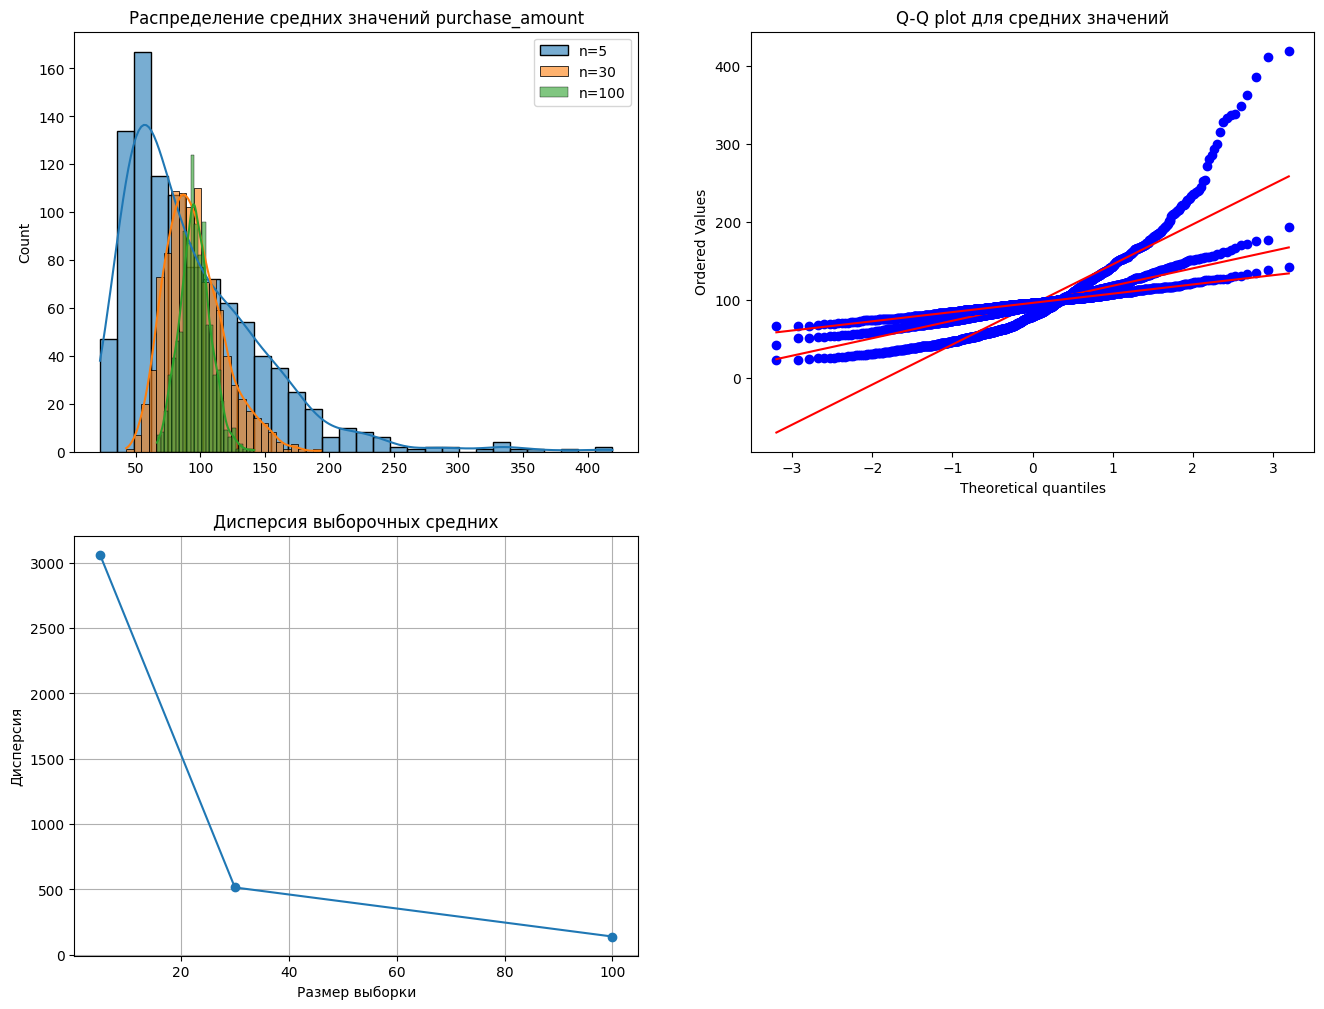

In [142]:
# Параметры
n_iterations = 1000
sample_sizes = [5, 30, 100]

# Хранение результатов выборочных средних
means = {size: [] for size in sample_sizes}

# Генерация выборок и расчет средних
for size in sample_sizes:
    for _ in range(n_iterations):
        sample = data.sample(size, replace=True)
        means[size].append(sample.mean())

# Расчет дисперсий выборочных средних
variances = {size: np.var(means[size]) for size in sample_sizes}

# Визуализация результатов
plt.figure(figsize=(16, 12))

# Гистограммы средних
plt.subplot(2, 2, 1)
for size in sample_sizes:
    sns.histplot(means[size], kde=True, alpha=0.6, label=f'n={size}')
plt.title('Распределение средних значений purchase_amount')
plt.legend()

# Q-Q plots
plt.subplot(2, 2, 2)
for size in sample_sizes:
    stats.probplot(means[size], plot=plt)
plt.title('Q-Q plot для средних значений')

# График дисперсий
plt.subplot(2, 2, 3)
plt.plot(sample_sizes, [variances[size] for size in sample_sizes], marker='o')
plt.title('Дисперсия выборочных средних')
plt.xlabel('Размер выборки')
plt.ylabel('Дисперсия')
plt.grid(True)

# Численные результаты
print("Эмпирические дисперсии выборочных средних:")
for size in sample_sizes:
    print(f"Размер выборки n={size}:")
    print(f"  Эмпирическая дисперсия: {variances[size]:.4f}")



Выводы:
С ростом размера выборки (5,30,100) распределение средних приближается по форме к нормальному распределению, а дисперсия средних снижается.


**F. Параметрические оценки**
- Для purchase_amount (среди покупателей) попытаться подобрать распределение (лог-нормальное, гамма и т.п.). Оцените параметры методом максимального правдоподобия или методом моментов.
- Проверить адекватность модели (Q-Q plot или сравнение эмпирической и теоретической плотностей).
- Сделать вывод, можно ли использовать выбранное распределение для симуляций/прогнозов.

Сравнение моделей по информационным критериям:


,AIC,BIC,p-value,Лучшая модель (AIC),Лучшая модель (BIC)
lognorm,19724.444546,19740.964322,0.0,False,False
gamma,20195.258194,20211.777969,0.0,False,False
weibull,inf,inf,0.0,False,False
expon,20215.718709,20226.731893,0.0,False,False
burr,19605.601159,19627.627526,0.352583,True,True


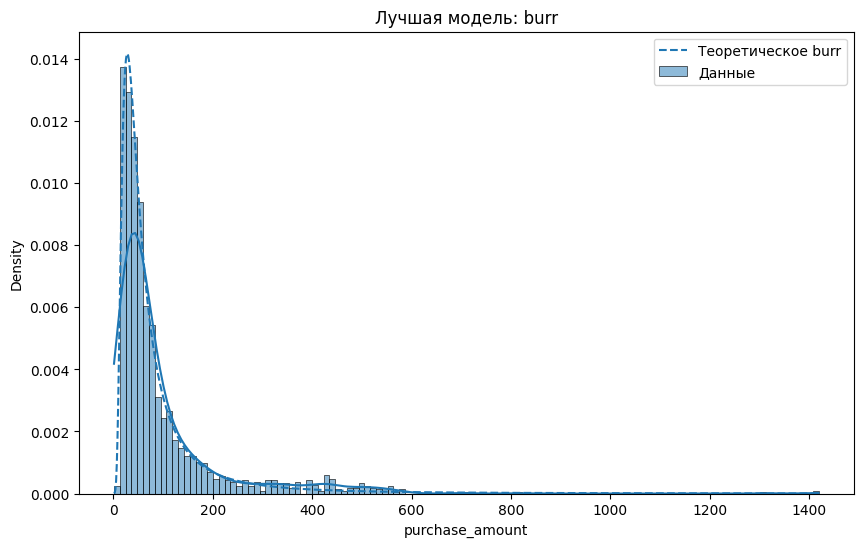

In [140]:

# Загрузка и фильтрация данных
df = pd.read_csv('dataset.csv', sep=';', decimal=',')
df = df[df['converted'] == 1]  # берем только покупателей
data = df[df['purchase_amount'] > 0]['purchase_amount'].dropna()

# Функция для расчета AIC и BIC
def calculate_criteria(distribution, data):
    params = distribution.fit(data)
    k = len(params)  # число параметров
    n = len(data)
    llf = distribution.logpdf(data, *params).sum()  # логарифмическая функция правдоподобия
    aic = 2*k - 2*llf
    bic = k*np.log(n) - 2*llf
    return aic, bic

# Оценка моделей
distributions = {
    'lognorm': lognorm,
    'gamma': gamma,
    'weibull': weibull_min,
    'expon': expon,
    'burr': burr
}

results = {}

for name, dist in distributions.items():
    try:
        aic, bic = calculate_criteria(dist, data)
        params = dist.fit(data)
        p_value = stats.kstest(data, dist.name, args=params).pvalue
        results[name] = {
            'AIC': aic,
            'BIC': bic,
            'p-value': p_value,
            'params': params
        }
    except:
        results[name] = {'error': 'Не удалось оценить параметры'}

# Формируем таблицу результатов
criteria_df = pd.DataFrame(results).T
criteria_df['Лучшая модель (AIC)'] = criteria_df['AIC'] == criteria_df['AIC'].min()
criteria_df['Лучшая модель (BIC)'] = criteria_df['BIC'] == criteria_df['BIC'].min()

# Вывод результатов
print("Сравнение моделей по информационным критериям:")
display(criteria_df[['AIC', 'BIC', 'p-value', 'Лучшая модель (AIC)', 'Лучшая модель (BIC)']])

# Визуализация лучшей модели
best_model = criteria_df[criteria_df['Лучшая модель (AIC)'] == True].index[0]

plt.figure(figsize=(10, 6))
sns.histplot(data, kde=True, stat='density', label='Данные')
x = np.linspace(min(data), max(data), 1000)
pdf = distributions[best_model].pdf(x, *results[best_model]['params'])
plt.plot(x, pdf, label=f'Теоретическое {best_model}', linestyle='--')
plt.legend()
plt.title(f'Лучшая модель: {best_model}')
plt.show()


Оценим модель

/tmp/ipython-input-4170626350.py:34: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  mm_params = fsolve(moment_equations, initial_params)


Параметры по методу максимального правдоподобия:
c = 1.5000
d = 3.8933
scale = 17.9522

Параметры по методу моментов:
c = 1.0000
d = 1.0000
scale = 95.9554


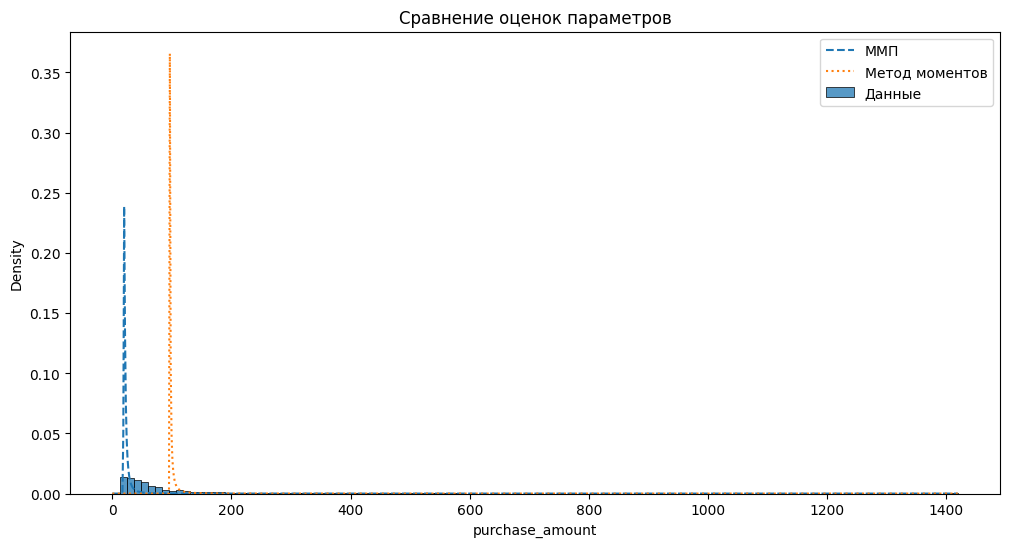

In [143]:
# Метод максимального правдоподобия
def neg_loglikelihood(params):
    c, d, scale = params
    return -np.sum(burr.logpdf(data, c, d, scale=scale))

# Начальные приближения для параметров
initial_params = [1, 1, data.mean()]

# Оптимизация
result = minimize(neg_loglikelihood, initial_params, method='Nelder-Mead')
ml_params = result.x

# Метод моментов
def moment_equations(params):
    c, d, scale = params
    # Вычисляем теоретические моменты
    mu1_th = burr.mean(c, d, scale=scale)
    mu2_th = burr.moment(2, c, d, scale=scale)
    mu3_th = burr.moment(3, c, d, scale=scale)

    # Вычисляем выборочные моменты
    mu1_emp = np.mean(data)
    mu2_emp = np.mean(data**2)
    mu3_emp = np.mean(data**3)

    return [
        mu1_th - mu1_emp,
        mu2_th - mu2_emp,
        mu3_th - mu3_emp
    ]

# Оптимизация для метода моментов
from scipy.optimize import fsolve
mm_params = fsolve(moment_equations, initial_params)

# Результаты
print("Параметры по методу максимального правдоподобия:")
print(f"c = {ml_params[0]:.4f}")
print(f"d = {ml_params[1]:.4f}")
print(f"scale = {ml_params[2]:.4f}")

print("\nПараметры по методу моментов:")
print(f"c = {mm_params[0]:.4f}")
print(f"d = {mm_params[1]:.4f}")
print(f"scale = {mm_params[2]:.4f}")

# Визуализация результатов
plt.figure(figsize=(12, 6))

# Гистограмма данных
sns.histplot(data, kde=False, stat='density', label='Данные')

# Теоретические плотности
x = np.linspace(0, max(data), 1000)
plt.plot(x, burr.pdf(x, *ml_params), label='ММП', linestyle='--')
plt.plot(x, burr.pdf(x, *mm_params), label='Метод моментов', linestyle=':')

plt.title('Сравнение оценок параметров')
plt.legend()
plt.show()


**Вывод:** график распредеелния burr наиболее точно повтоярет контуры распределения

Тест Колмогорова-Смирнова: p-value = 0,35 > 0,05 - распределение установлено верно. Можем использовать его для симуляций/прогнозов.

**G. Свойства оценок и обсуждение**.  
Для оценки среднего purchase_amount сравните оценки по смещённости и состоятельности (можно проверить моделированием: берем несколько случайных выборок разного размера (10, 50, 200) и считаем среднее. Далее вычитаем среднее ГС и выборок – делаем вывод)

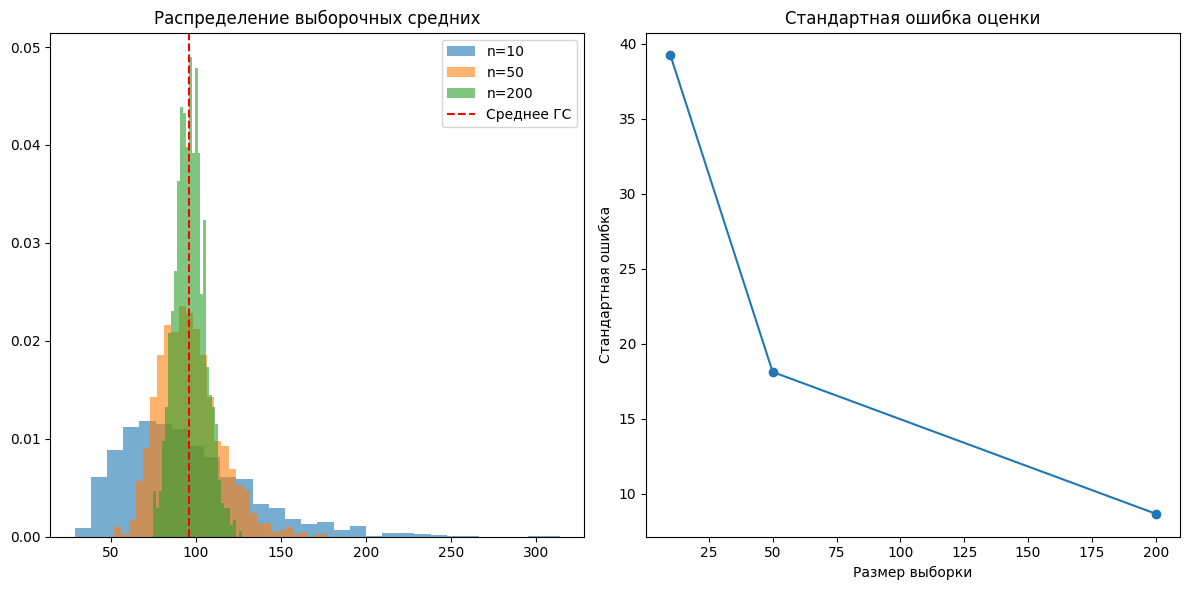

Анализ смещенности:
Размер выборки n=10:
  Смещение: -1.3363
  Стандартная ошибка: 39.2308

Размер выборки n=50:
  Смещение: 0.1265
  Стандартная ошибка: 18.1221

Размер выборки n=200:
  Смещение: 0.5595
  Стандартная ошибка: 8.6674

Среднее генеральной совокупности: 95.9554


In [144]:
# Генеральная совокупность
population_mean = data.mean()

# Размеры выборок для проверки
sample_sizes = [10, 50, 200]
num_simulations = 1000

# Хранение результатов
means = {size: [] for size in sample_sizes}

# Моделирование
for size in sample_sizes:
    for _ in range(num_simulations):
        sample = data.sample(size, replace=True)
        means[size].append(sample.mean())

# Анализ смещенности
bias = {size: np.mean(means[size]) - population_mean for size in sample_sizes}

# Анализ состоятельности
std_errors = {size: np.std(means[size]) for size in sample_sizes}

# Визуализация
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
for size in sample_sizes:
    plt.hist(means[size], alpha=0.6, bins=30, label=f'n={size}', density=True)
plt.axvline(population_mean, color='red', linestyle='--', label='Среднее ГС')
plt.title('Распределение выборочных средних')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(sample_sizes, [std_errors[size] for size in sample_sizes], marker='o')
plt.title('Стандартная ошибка оценки')
plt.xlabel('Размер выборки')
plt.ylabel('Стандартная ошибка')
# plt.xscale('log')

plt.tight_layout()
plt.show()

# Вывод результатов
print("Анализ смещенности:")
for size in sample_sizes:
    print(f"Размер выборки n={size}:")
    print(f"  Смещение: {bias[size]:.4f}")
    print(f"  Стандартная ошибка: {std_errors[size]:.4f}\n")

print(f"Среднее генеральной совокупности: {population_mean:.4f}")


Выводы:
Оценка среднего является асимптотически несмещенной (при увеличении размера выборки смещение приближается к нулю).   
Оценка среднего состоятельна (стандартная ошибка уменьшается с ростом выборки, ЗБТ подтверждается)
Для обеспечения точности и наджености размер выборки должен быть не менее 200.

**H. Бизнес-вывод**


Средний чек определяется:
- проводимой рекламной компанией (клиенты с разным средним чеком)
- источником трафика (органический и реферальный трафик дает клиентов лучше)
- регионом (разная покупательская способоность)
- поведение пользователя на сайт (глубина погружения)

Конверсия зависит от:
- источника трафика (платный трафик дает конверсию выше)
- временем на сайте (чем больше времени тем выше вероятность покупки)
- глубина погружения (чем больше страниц просмотрено, тем выше вероятность покупки)

Рекомендации:
- провести оценку среднего чека по источникам трафика и пересмотреть стратегию в их пользу
- оценить с помощью стат моделей влияние времени и глубины погружения в сайт на продажи и конверсию, на основании полученных данных оптимизировать путь клиента.

**Оценка рисков**

Статистические риски:

- Выбросы в данных могут искажать общую картину

- Неравномерность выборки по регионам

- Сезонность не учтена в анализе

Рекомендации:
- обработка выбросов
- стартификация выборки, контроль размера выборки, избегаем смещений
- проводим анализ на сезонность для увеличения точности оценки и прогноза